<a href="https://colab.research.google.com/github/jnagabooshanam-hub/ChurnPrediction_Project/blob/main/Customer_Churn_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


# 2. LOAD DATA


In [ ]:
FILE_PATH = "D:\AI-ML\customer_cases.csv"

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\A02348\AppData\Local\Temp\ipykernel_1168\1534275694.py:1: SyntaxWarning: invalid escape sequence '\A'
  FILE_PATH = "D:\AI-ML\customer_cases.csv"


In [ ]:
df = pd.read_csv(FILE_PATH)

In [ ]:
df

,Unnamed: 0,case_id,date_time,customer_id,age,gender,product,signup_date_time,cancel_date_time,Service_type,Service_Price,channel,reason
0,1,CC101,1/1/2017,C2448,76,female,prd_1,1/1/2017,NaN,annual_subscription,1200,phone,signup
1,2,CC102,1/1/2017,C2449,61,male,prd_1,1/1/2017,9/5/2021,annual_subscription,1200,phone,signup
2,3,CC103,1/1/2017,C2450,58,female,prd_1,1/1/2017,1/13/2019,annual_subscription,1200,phone,signup
3,4,CC104,1/1/2017,C2451,62,female,prd_2,1/1/2017,NaN,monthly_subscription,125,phone,signup
4,5,CC105,1/1/2017,C2452,71,male,prd_1,1/1/2017,6/28/2021,annual_subscription,1200,phone,signup
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330507,330508,CC330608,12/31/2021,C173079,51,male,prd_1,5/22/2018,NaN,annual_subscription,1200,email,support
330508,330509,CC330609,12/31/2021,C497581,70,male,prd_2,10/25/2021,NaN,monthly_subscription,125,email,support
330509,330510,CC330610,12/31/2021,C127630,53,male,prd_2,10/14/2021,NaN,monthly_subscription,125,email,support
330510,330511,CC330611,12/31/2021,C497538,58,female,prd_2,10/25/2021,NaN,monthly_subscription,125,email,support


In [2]:
import pandas as pd
from google.colab import files
import io
#uploaded = files.upload()
df = pd.read_csv('Customer-Churn.csv')
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 3. DATA TYPE FIXING

In [7]:
date_cols = ["date_time", "signup_date_time", "cancel_date_time"]

In [8]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

KeyError: 'date_time'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        330512 non-null  int64         
 1   case_id           330512 non-null  object        
 2   date_time         330512 non-null  datetime64[ns]
 3   customer_id       330512 non-null  object        
 4   age               330512 non-null  int64         
 5   gender            330512 non-null  object        
 6   product           330512 non-null  object        
 7   signup_date_time  330512 non-null  datetime64[ns]
 8   cancel_date_time  76686 non-null   datetime64[ns]
 9   Service_type      330512 non-null  object        
 10  Service_Price     330512 non-null  int64         
 11  channel           330512 non-null  object        
 12  reason            330512 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 32.

# 4. TARGET VARIABLE (CHURN)

In [ ]:
df["churn"] = df["cancel_date_time"].notna().astype(int)

In [ ]:
# Note - If the customer has a cancel date → "True" = 1

        # If it's empty/NaN → "False" - 0

In [ ]:
df["churn"]

0         0
1         1
2         1
3         0
4         1
         ..
330507    0
330508    0
330509    0
330510    0
330511    0
Name: churn, Length: 330512, dtype: int64

# 5. FEATURE ENGINEERING

In [ ]:
today = pd.Timestamp.today()

In [ ]:
print(today)

2026-02-13 13:01:25.862327


In [ ]:
# Tenure in days :

df["tenure_days"] = (df["cancel_date_time"].fillna(today) - df["signup_date_time"]).dt.days


## Note :- “For each customer, calculate how many days they were active. If they canceled, use their cancel date.
# If they haven’t canceled, use today’s date.”

# Formula = tenure_days = (end_date - start_date).days

# start_date = signup_date_time (when the customer joined)

# end_date = cancel_date_time if exists, else today (current date)


In [ ]:
df["cancel_date_time"]

0               NaT
1        2021-09-05
2        2019-01-13
3               NaT
4        2021-06-28
            ...    
330507          NaT
330508          NaT
330509          NaT
330510          NaT
330511          NaT
Name: cancel_date_time, Length: 330512, dtype: datetime64[ns]

In [ ]:
 df["signup_date_time"]

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
330507   2018-05-22
330508   2021-10-25
330509   2021-10-14
330510   2021-10-25
330511   2021-09-08
Name: signup_date_time, Length: 330512, dtype: datetime64[ns]

In [ ]:
df["tenure_days"].head(10)

0    3330
1    1708
2     742
3    3330
4    1639
5    3330
6    1612
7    3329
8     157
9     327
Name: tenure_days, dtype: int64

In [ ]:
# Age Groups by creating Bins :

df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 30, 45, 60, 100],
    labels=["<30", "30-45", "45-60", "60+"]
)

In [ ]:
df

,Unnamed: 0,case_id,date_time,customer_id,age,gender,product,signup_date_time,cancel_date_time,Service_type,Service_Price,channel,reason,churn,tenure_days,age_group
0,1,CC101,2017-01-01,C2448,76,female,prd_1,2017-01-01,NaT,annual_subscription,1200,phone,signup,0,3330,60+
1,2,CC102,2017-01-01,C2449,61,male,prd_1,2017-01-01,2021-09-05,annual_subscription,1200,phone,signup,1,1708,60+
2,3,CC103,2017-01-01,C2450,58,female,prd_1,2017-01-01,2019-01-13,annual_subscription,1200,phone,signup,1,742,45-60
3,4,CC104,2017-01-01,C2451,62,female,prd_2,2017-01-01,NaT,monthly_subscription,125,phone,signup,0,3330,60+
4,5,CC105,2017-01-01,C2452,71,male,prd_1,2017-01-01,2021-06-28,annual_subscription,1200,phone,signup,1,1639,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330507,330508,CC330608,2021-12-31,C173079,51,male,prd_1,2018-05-22,NaT,annual_subscription,1200,email,support,0,2824,45-60
330508,330509,CC330609,2021-12-31,C497581,70,male,prd_2,2021-10-25,NaT,monthly_subscription,125,email,support,0,1572,60+
330509,330510,CC330610,2021-12-31,C127630,53,male,prd_2,2021-10-14,NaT,monthly_subscription,125,email,support,0,1583,45-60
330510,330511,CC330611,2021-12-31,C497538,58,female,prd_2,2021-10-25,NaT,monthly_subscription,125,email,support,0,1572,45-60


# 6. DESCRIPTIVE ANALYSIS

In [ ]:
print(df.describe(include="all"))

           Unnamed: 0 case_id                      date_time customer_id  \
count   330512.000000  330512                         330512      330512   
unique            NaN  330512                            NaN      258660   
top               NaN   CC101                            NaN      C20510   
freq              NaN       1                            NaN           5   
mean    165256.500000     NaN  2020-05-09 14:09:27.613884416         NaN   
min          1.000000     NaN            2017-01-01 00:00:00         NaN   
25%      82628.750000     NaN            2019-06-30 00:00:00         NaN   
50%     165256.500000     NaN            2020-08-07 00:00:00         NaN   
75%     247884.250000     NaN            2021-06-06 00:00:00         NaN   
max     330512.000000     NaN            2022-01-01 00:00:00         NaN   
std      95410.740423     NaN                            NaN         NaN   

                  age  gender product               signup_date_time  \
count   330512.

In [ ]:
print(df["churn"].value_counts(normalize=True))

churn
0    0.767978
1    0.232022
Name: proportion, dtype: float64


In [ ]:
# 0 = Active, 1 = Churned)

# 7. VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt

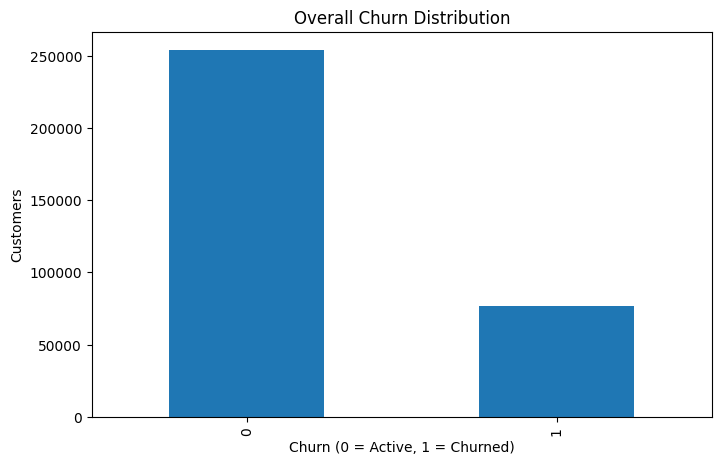

In [ ]:
# 7.1 Overall Churn Distribution


plt.figure(figsize=(8,5))  # <-- Set figure size (width=8, height=5)
df["churn"].value_counts().plot(kind="bar")
plt.title("Overall Churn Distribution")
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Customers")
plt.show()

<Figure size 900x600 with 0 Axes>

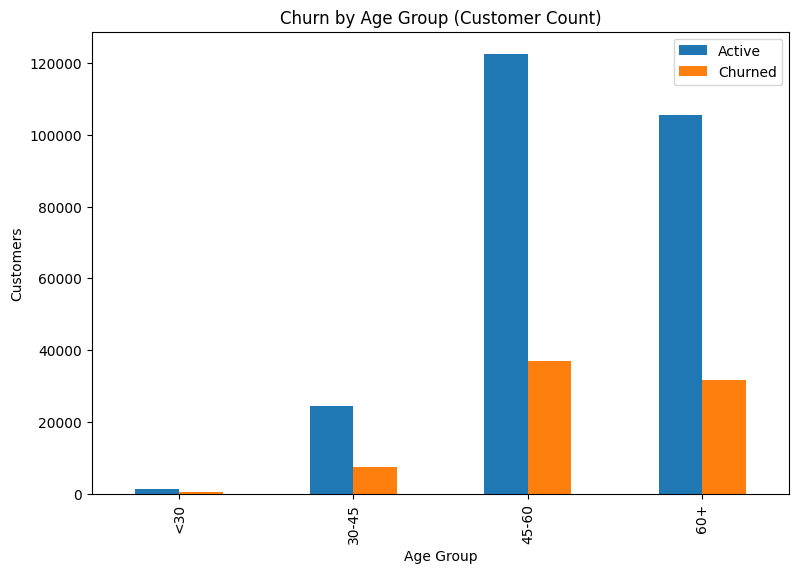

In [ ]:
# 7.2 AGE WISE CHURN (COUNT)


# Set figure size
plt.figure(figsize=(9,6))

# Create bar chart of churn by age group
pd.crosstab(df["age_group"], df["churn"]).plot(kind="bar", figsize=(9,6))

# Titles and labels
plt.title("Churn by Age Group (Customer Count)")
plt.xlabel("Age Group")
plt.ylabel("Customers")
plt.legend(["Active", "Churned"])

# Show plot
plt.show()


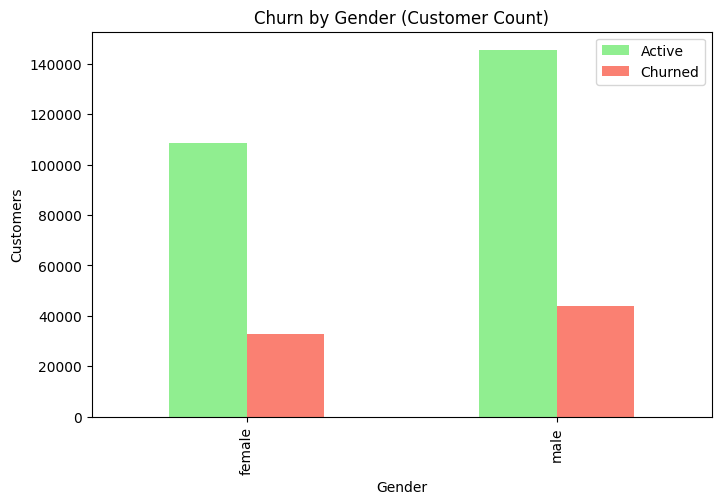

In [ ]:
# 7.3 GENDER WISE CHURN (COUNT)

# Plot churn by gender
pd.crosstab(df["gender"], df["churn"]).plot(kind="bar", figsize=(8,5), color=['lightgreen', 'salmon'])

# Titles and labels
plt.title("Churn by Gender (Customer Count)")
plt.xlabel("Gender")
plt.ylabel("Customers")
plt.legend(["Active", "Churned"])

# Show plot
plt.show()

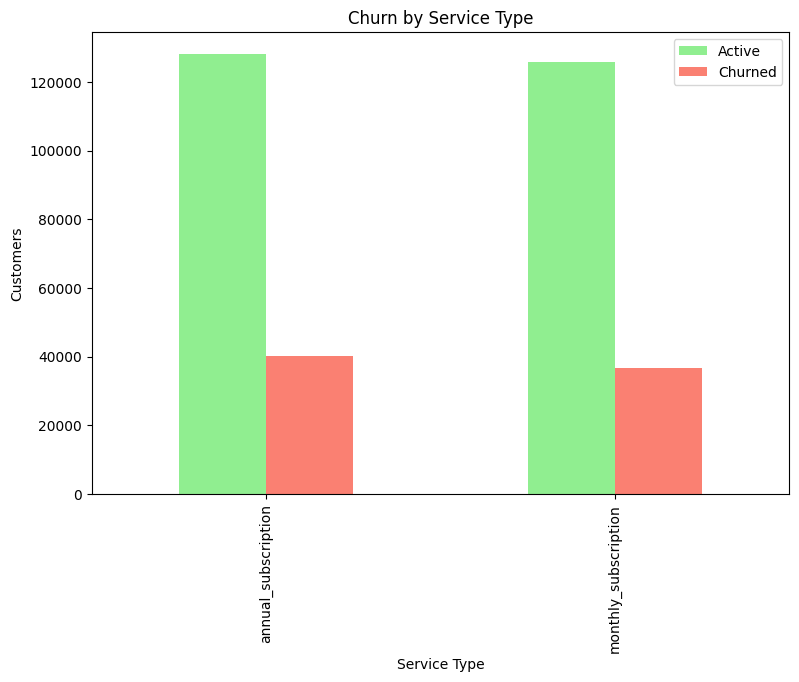

In [ ]:
# 7.4 Churn by Service Type

pd.crosstab(df["Service_type"], df["churn"]).plot(
    kind="bar",
    figsize=(9,6),
    color=['lightgreen', 'salmon']  # Active = lightgreen, Churned = salmon
)

# Titles and labels
plt.title("Churn by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Customers")
plt.legend(["Active", "Churned"])

# Show plot
plt.show()

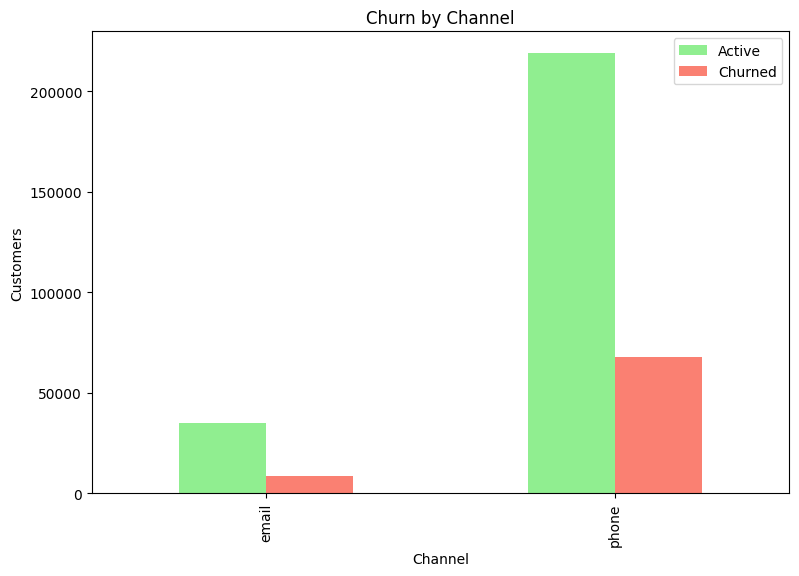

In [ ]:
# 7.5 Churn by Channel

# Plot churn by channel
pd.crosstab(df["channel"], df["churn"]).plot(
    kind="bar",
    figsize=(9,6),
    color=['lightgreen', 'salmon']  # Active = lightgreen, Churned = salmon
)

# Titles and labels
plt.title("Churn by Channel")
plt.xlabel("Channel")
plt.ylabel("Customers")
plt.legend(["Active", "Churned"])

# Show plot
plt.show()

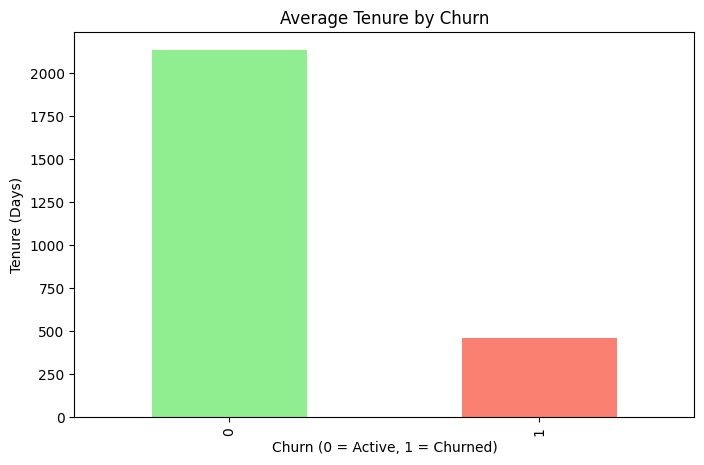

In [ ]:
# 7.6Tenure vs Churn


# Plot average tenure by churn
df.groupby("churn")["tenure_days"].mean().plot(
    kind="bar",
    figsize=(8,5),
    color=['lightgreen', 'salmon']  # Active = lightgreen, Churned = salmon
)

# Titles and labels
plt.title("Average Tenure by Churn")
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Tenure (Days)")

# Show plot
plt.show()

# 8. ENCODING CATEGORICAL DATA

In [ ]:

cat_cols = ["gender", "product", "Service_type", "channel", "reason"]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
df

,Unnamed: 0,case_id,date_time,customer_id,age,gender,product,signup_date_time,cancel_date_time,Service_type,Service_Price,channel,reason,churn,tenure_days,age_group
0,1,CC101,2017-01-01,C2448,76,0,0,2017-01-01,NaT,0,1200,1,0,0,3330,60+
1,2,CC102,2017-01-01,C2449,61,1,0,2017-01-01,2021-09-05,0,1200,1,0,1,1708,60+
2,3,CC103,2017-01-01,C2450,58,0,0,2017-01-01,2019-01-13,0,1200,1,0,1,742,45-60
3,4,CC104,2017-01-01,C2451,62,0,1,2017-01-01,NaT,1,125,1,0,0,3330,60+
4,5,CC105,2017-01-01,C2452,71,1,0,2017-01-01,2021-06-28,0,1200,1,0,1,1639,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330507,330508,CC330608,2021-12-31,C173079,51,1,0,2018-05-22,NaT,0,1200,0,1,0,2824,45-60
330508,330509,CC330609,2021-12-31,C497581,70,1,1,2021-10-25,NaT,1,125,0,1,0,1572,60+
330509,330510,CC330610,2021-12-31,C127630,53,1,1,2021-10-14,NaT,1,125,0,1,0,1583,45-60
330510,330511,CC330611,2021-12-31,C497538,58,0,1,2021-10-25,NaT,1,125,0,1,0,1572,45-60


# 9. MODEL DATASET

In [ ]:

features = [
    "age",
    "Service_Price",
    "tenure_days",
    "gender",
    "product",
    "Service_type",
    "channel",
    "reason"
]

X = df[features]
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)